### SEP 786 Assignment 2

Student Name : Yu Zhang

Student ID: 400429707

Student Email: zhang21@mcmaster.ca

Program: Ph.D. in Mechanical Engineering

In [1]:
import numpy as np
import numpy
import math
import random
import matplotlib.pyplot as plt
import sklearn.discriminant_analysis




### Q1
Generate two sets of data

In [2]:
mean1 = [-3, 0, -1, -2, -4,-3, 0, -1, -2, -4]
mean2 = [3, 1, 0, -2, 4,-3, 0, -1, -2, -4]

cov = [[12,1,2,3,0,0,0,0,0,0],
       [1,13,0,0,0,0,0,0,0,0],
       [2,0,4,0,0,0,0,0,0,0],
       [3,0,0,5,0,0,0,0,0,0],
       [0,0,0,0,6,0,0,0,0,0],
       [0,0,0,0,0,7,0,0,0,0],
       [0,0,0,0,0,0,8,0,0,0],
       [0,0,0,0,0,0,0,9,0,0],
       [0,0,0,0,0,0,0,0,10,0],
       [0,0,0,0,0,0,0,0,0,11],
       ]

x1 = numpy.random.multivariate_normal(mean1, cov, 1000)

x2 = numpy.random.multivariate_normal(mean2, cov, 1000)

X = numpy.concatenate((x1,x2))

#first half of the data from class 0, second half from class 1
X_Label = numpy.zeros(1000)
X_Label = numpy.concatenate((X_Label, numpy.ones(1000)))

print(X.shape)

(2000, 10)


### Q2
a. Reduce the dimensionality

b. classification error

In [3]:
X_mean = X - numpy.mean(X)

C_x = numpy.dot(X_mean.T,X_mean)

SS_pca,V = numpy.linalg.eig(C_x)

sortIndex = numpy.flip(numpy.argsort(SS_pca))

ESorted = numpy.empty((10,0))
dimension = 10
for i in range(dimension):
    ESorted = numpy.append(ESorted, V[:,sortIndex[i]].reshape(10,1), axis=1)


meanSquareError = numpy.zeros(6,)
classificationError = numpy.zeros(6,)
ySorted = numpy.dot(X,ESorted)



for numDims in range(5,11): 
    
    # reconstruction
    yReduced = ySorted[:,0:numDims]
    print('Reduced score shape is ', yReduced.shape)
    EReduced = ESorted[:,0:numDims]
    print('Reduced right-singular vectors shape is {}\n'.format(EReduced.shape))
    XReconstructed = numpy.dot(yReduced, numpy.transpose(EReduced))
    meanSquareError[numDims-5] = sum(sum((XReconstructed - X)**2))/2000

    lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()

    lda.fit(yReduced,X_Label)
    #testing
    prediction = lda.predict(yReduced)
    classificationError[numDims-5] = sum(prediction != X_Label)


print("MSE between the reconstructed dataset and the original data = {} \n".format(meanSquareError) )

print("total pca error = ", classificationError)

Reduced score shape is  (2000, 5)
Reduced right-singular vectors shape is (10, 5)

Reduced score shape is  (2000, 6)
Reduced right-singular vectors shape is (10, 6)

Reduced score shape is  (2000, 7)
Reduced right-singular vectors shape is (10, 7)

Reduced score shape is  (2000, 8)
Reduced right-singular vectors shape is (10, 8)

Reduced score shape is  (2000, 9)
Reduced right-singular vectors shape is (10, 9)

Reduced score shape is  (2000, 10)
Reduced right-singular vectors shape is (10, 10)

MSE between the reconstructed dataset and the original data = [3.86887329e+01 2.89238911e+01 1.89409704e+01 9.85684365e+00
 5.03421377e+00 5.97855266e-28] 

total pca error =  [64. 53. 50. 56. 52. 48.]


Plot mean square Error

Text(0.5, 1.0, 'MSE')

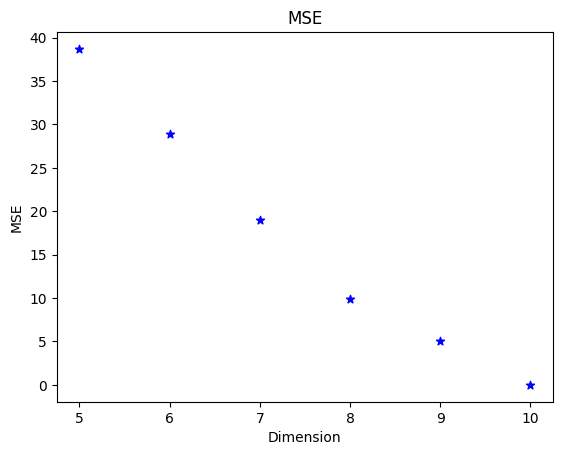

In [4]:
plt.scatter([5,6,7,8,9,10], meanSquareError, c = 'b', marker = '*')
plt.xlabel('Dimension')
plt.ylabel('MSE')
plt.title('MSE')

Plot classification error

Text(0.5, 1.0, 'Classification Error')

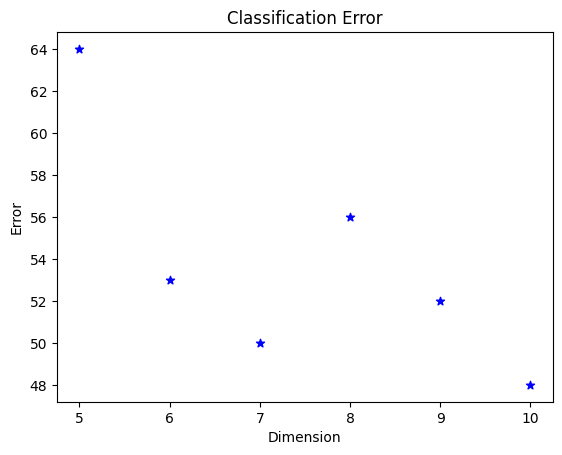

In [5]:
plt.scatter([5,6,7,8,9,10], classificationError, c = 'b', marker = '*')
plt.xlabel('Dimension')
plt.ylabel('Error')
plt.title('Classification Error')

### Q3

backward search

In [6]:
dimension = 6

removed = []

index_all = [0,1,2,3,4,5, 6, 7,8,9]
remaining = index_all
error= 10000*numpy.ones(dimension)

lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X,X_Label)
prediction = lda.predict(X)
error[0] = sum(prediction != X_Label)

Xselection = X




for iteration in range(dimension-1):
    
    
    error_inside = 10000*numpy.ones(10)
    for idx, item in enumerate(remaining):
        temp_removed = removed[:]
        temp_removed.append(item)
        # print(temp_removed)
            
        
        Xtest = np.delete(X, temp_removed , axis= 1)
       
        lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
        lda.fit(Xtest,X_Label)
        prediction = lda.predict(Xtest)
            
        error_inside[idx] = sum(prediction != X_Label)

    worst_i = numpy.argmin(error_inside)

    worst_item = remaining[worst_i]

    removed.append(worst_item)
    print("The removed colomns",removed) 

    remaining.remove(worst_item)
    print("The remained colomns {}\n".format(remaining) )

    Xselection = np.delete(X, removed, 1)

    lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
    lda.fit(Xselection,X_Label)
    prediction = lda.predict(Xselection)
        
    error[iteration+1] = sum(prediction != X_Label)

 

    

print("Classification error using backward search = ",error)

The removed colomns [1]
The remained colomns [0, 2, 3, 4, 5, 6, 7, 8, 9]

The removed colomns [1, 7]
The remained colomns [0, 2, 3, 4, 5, 6, 8, 9]

The removed colomns [1, 7, 8]
The remained colomns [0, 2, 3, 4, 5, 6, 9]

The removed colomns [1, 7, 8, 5]
The remained colomns [0, 2, 3, 4, 6, 9]

The removed colomns [1, 7, 8, 5, 2]
The remained colomns [0, 3, 4, 6, 9]

Classification error using backward search =  [48. 46. 46. 46. 46. 46.]


Text(0.5, 1.0, 'Classification Error using backward search')

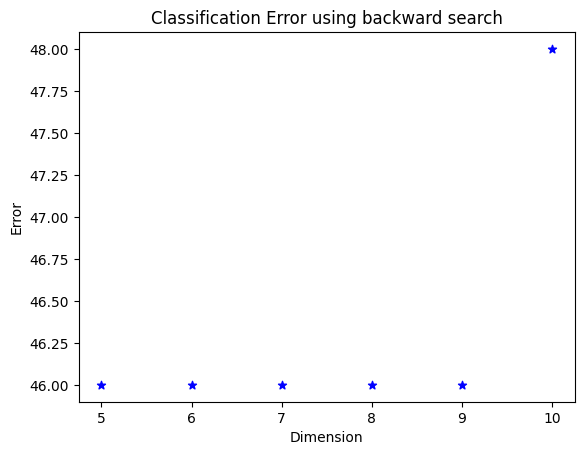

In [7]:
plt.scatter([5,6,7,8,9,10], np.flip(error), c = 'b', marker = '*')
plt.xlabel('Dimension')
plt.ylabel('Error')
plt.title('Classification Error using backward search')

### Q4

Part 3 has smaller errors, using backward search.

Part 2b has larger errors, usning PCA.

PCA transfers the original data to the score space. Each columns in the score space contributes to the classification evenif its impact is very small. Reducing dimensionality causes the classification error going high.

Backward search applies to the original data, removing the dimensionality with the least impacts each time. Some dimensionality maybe not contribute the classification. Removing such dimensionality does not cause the error varing intensively.
